## Ερώτηση 3

#### Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics



In [2]:
df_bus = pd.read_csv("phily_businesses.csv")
print(df_bus.shape)
df_bus.head(2)

(14569, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."


In [3]:
matches = ["Japanese", "Italian", "Burgers"]
def filter_restaurants(category):
    try: 
        if "Restaurant" in category:
            matches_count = 0
            category_match = ""
            for match in matches:
                if match in category:
                    category_match = matches.index(match)
                    matches_count += 1
            if matches_count == 1:
                return category_match
        return None
    except:
        return None
df_bus["category"] = df_bus["categories"].apply(filter_restaurants)
df_bus.dropna(subset=['categories'], inplace=True)
df_bus=df_bus.dropna(axis=0)
df_bus = df_bus[["business_id", "category"]]
df_bus.category = df_bus.category.astype(int)
df_bus.reset_index(drop=True, inplace=True)

print(df_bus.shape)
df_bus.head()


(951, 2)


,business_id,category
0,MUTTqe8uqyMdBl186RmNeA,0
1,QdN72BWoyFypdGJhhI5r7g,1
2,WYYdQDjx-DsCanlP0DpImQ,0
3,O1oZpbZNDMH_gz8DhsZCdA,2
4,dChRGpit9fM_kZK5pafNyA,2


Αντιστοιχισα τις κατηγοριες σε αριθμους(με βαση το index τους στο πινακα matches) για να υπολογιστει το confusion matrix.   
Η αντιστοιχιση ειναι η εξης:   
* Japanese => 0
* Italian => 1
* Burger => 2

In [4]:
df_rev = pd.read_csv("reviews.csv")
df_rev = df_rev[df_rev.business_id.isin(df_bus.business_id)]

In [5]:
# --------The sum of reviews for each business seperate
df_rev = pd.read_csv("reviews.csv")
df_rev = df_rev[df_rev.business_id.isin(df_bus.business_id)]
df_rev = df_rev[["review_id","business_id", "text"]]
df_rev = df_rev.groupby(by= "business_id")["text"].sum()
reviews_by_business = df_bus.merge(df_rev, on="business_id")
print(reviews_by_business.shape)
reviews_by_business.head()

(951, 3)


,business_id,category,text
0,MUTTqe8uqyMdBl186RmNeA,0,Stopped in to check out this new spot around t...
1,QdN72BWoyFypdGJhhI5r7g,1,"This place is top notch, with phenomenal servi..."
2,WYYdQDjx-DsCanlP0DpImQ,0,Delicious and very nicely presented. We had J ...
3,O1oZpbZNDMH_gz8DhsZCdA,2,This Wendy's is the worst Wendy's to go to . T...
4,dChRGpit9fM_kZK5pafNyA,2,I am not known for favorable restaurant review...


Ο παραπανω πινακας περιεχει για καθε επιχειρηση τη κατηγορια της και ολες τις κριτικες που εχουν γινει σε αυτη στη μορφη ενος string.   

In [6]:
X = reviews_by_business
X.shape

(951, 3)

In [7]:
vectorizer = TfidfVectorizer(stop_words = "english", max_features= 1000, min_df=4,max_df=0.8)
X_v = vectorizer.fit_transform(X.text)
X_v.shape

(951, 1000)

#### 1ο Ερωτημα

In [8]:
kmeans = KMeans(n_clusters= 3)

X_array = X_v.todense()
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
agg_single = AgglomerativeClustering(n_clusters=3, linkage="single")
agg_avg = AgglomerativeClustering(n_clusters=3, linkage="average")

k = kmeans.fit(X_v)
agg_ward.fit(X_array)
agg_complete.fit(X_array)
agg_avg.fit(X_array)
agg_single.fit(X_array)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [9]:
def cluster_class_mapping(kmeans_labels, true_labels):
    C = metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C, axis=1))
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels, C

In [10]:
algo_labels = [kmeans.labels_, agg_ward.labels_, agg_avg.labels_, agg_complete.labels_, agg_single.labels_]
algo_order_strings = ["Kmeans", "Agglomerative Ward", "Agglomerative Average", "Agglomerative Complete", "Agglomerative Single"]

for i,labels in enumerate(algo_labels):
    print(algo_order_strings[i])
    print(cluster_class_mapping(algo_labels[i], X.category)[1])
    print("\n")

Kmeans
[[ 67 264 291]
 [  0 167  24]
 [137   0   1]]


Agglomerative Ward
[[ 98 256 293]
 [  0 175  23]
 [106   0   0]]


Agglomerative Average
[[204 429 316]
 [  0   1   0]
 [  0   1   0]]


Agglomerative Complete
[[155 381  88]
 [ 49  48 228]
 [  0   2   0]]


Agglomerative Single
[[204 430 315]
 [  0   1   0]
 [  0   0   1]]




Μπορούμε να παρατηρήσουμε ότι ο Agglomerative με linkage single και linkage average, τοποθετούν τα περισσότερα στοιχεία σε ένα cluster, ενώ ο Agglomerative με linkage complete σε 2. Αντίθετα, ο Kmeans και o Agglomerative με linkage ward κάνουν πιο ισορροπημένη ομαδοποίηση με βάση τα πραγματικά μεγέθη των ομάδων, που φανερώνει καλύτερη απόδοση αφού προσεγγίζει καλυτέρα τις πραγματικές κατηγορίες.

#### 2ο Ερωτημα


In [11]:
centers = kmeans.cluster_centers_.argsort()
centers = centers[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(len(centers)):
    print(f"Cluster {i}:")
    str_words = ""
    for i in centers[i, :10]:
        str_words += terms[i] + " "
    print(str_words)

Cluster 0:
burger fries italian pasta bar sandwich table dinner bread salad 
Cluster 1:
pizza delivery crust wings pizzas pie slice fries salad slices 
Cluster 2:
sushi roll rolls rice tuna salmon sashimi spicy japanese tempura 


Από τις top 10 λέξεις μπορούμε να κατηγοριοποιήσουμε τους clusters αρκετά εύκολα, αφού σε ένα cluster υπάρχουν λέξεις όπως sushi, rolls, rice, tuna, ... και άλλες λέξεις από την Ιαπωνική κουζίνα, σε άλλο cluster βλέπουμε λέξεις όπως pizza, crust, pie ... που μπορούμε να καταλάβουμε ότι πρόκειται για Ιταλική κουζίνα. Τέλος, στον τελευταίο cluster βλέπουμε λέξεις όπως burger, fries ... που μπορούμε να καταλάβουμε ότι αφορά Burger εστιατόρια. Παρόλα αυτά, υπάρχουν αρκετές κοινές λέξεις μεταξύ των Italian και Burger που φαίνεται και στους πίνακες συσχετίσεων να μπερδεύουν τους αλγορίθμους.   

#### 3ο Ερώτημα

Στο παρακατω block, υπολογιζω το F1-score, Precision και Recall στο Kmeans και Agglomerative με ward linkage.

In [12]:
all_predictions = algo_labels[0:2] 

algo_true_predictions = []

for labels in all_predictions:
    algo_true_predictions.append(cluster_class_mapping(labels, X.category)[0])

for i, true_labels in enumerate(algo_true_predictions):
    print(algo_order_strings[i])
    print(f"F1 - measure for [Japanese, Italian, Burger]: {metrics.f1_score(X.category, true_labels, average=None)} -> {metrics.f1_score(X.category, true_labels, average='weighted')}")
    print(f"Precision for [Japanese, Italian, Burger]:{metrics.precision_score(X.category, true_labels, average=None)} -> {metrics.precision_score(X.category, true_labels, average='weighted')}")
    print(f"Recall for [Japanese, Italian, Burger]:{metrics.recall_score(X.category, true_labels, average=None)} -> {metrics.recall_score(X.category, true_labels, average='weighted')}")
    print("\n\n")

Kmeans
F1 - measure for [Japanese, Italian, Burger]: [0.80116959 0.53697749 0.62046908] -> 0.6213923510029269
Precision for [Japanese, Italian, Burger]:[0.99275362 0.87434555 0.46784566] -> 0.7646728699930888
Recall for [Japanese, Italian, Burger]:[0.67156863 0.387471   0.92088608] -> 0.6256572029442692



Agglomerative Ward
F1 - measure for [Japanese, Italian, Burger]: [0.68387097 0.55643879 0.60851506] -> 0.6010783961135712
Precision for [Japanese, Italian, Burger]:[1.         0.88383838 0.45285935] -> 0.7655498404868222
Recall for [Japanese, Italian, Burger]:[0.51960784 0.40603248 0.92721519] -> 0.6035751840168244





Στα παραπάνω αποτελέσματα φαίνεται το trade-off μεταξύ του Precision και Recall, αφού στις περισσότερες περιπτώσεις που ένα από τα δυο είναι πολύ υψηλό, το άλλο είναι αρκετά χαμηλότερο. Επίσης, βλέπουμε πως και οι δυο αλγόριθμοι ομαδοποιούν καλυτέρα τα Japanese εστιατόρια σε σχέση με τις άλλες δυο κατηγορίες. Συνολικά, ο Kmeans αλγόριθμος μας δίνει λίγο καλυτέρα αποτελέσματα από τον Agglomerative με ward linkage. 

#### 4ο Ερώτημα
Στο παρακάτω block αποθηκεύουμε το silhouette score και την ριζά του αθροίσματος της απόσταση του κάθε στοιχείου από το centroid του(SSE), για κάθε αλγορίθμου για να υπολογίσουμε τα διαγράμματα του σφάλματος και του silhouette.

Text(0, 0.5, 'silhouette score')

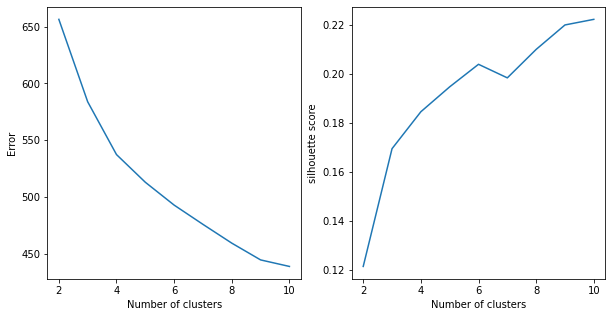

In [13]:
sse = np.zeros(9)
silhouette = np.zeros(9)
algorithm_centers = []


for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_v)
    sse[k-2] = kmeans.inertia_
    silhouette[k-2] = metrics.silhouette_score(X_v, kmeans.labels_)
    algorithm_centers.append(kmeans.cluster_centers_)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Error')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

Στο SSE διάγραμμα, βλέπουμε το Sum of Squares error να μειώνεται όσο αυξάνουμε το πλήθος των clusters. Από 8 έως 10 clusters ο ρυθμός μείωσης φαίνεται να έχει σταθεροποιηθεί. Επίσης, στο silhouette plot βλέπουμε αρκετά υψηλό score σε αυτό το range. Για αυτό θα κρατήσουμε **8 clusters**

In [15]:
k = 8
centers = algorithm_centers[k-2].argsort()
centers = centers[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(len(centers)):
    print(f"Cluster {i}:")
    str_words = ""
    for j in centers[i, :10]:
        str_words += terms[j] + " "
    print(str_words)

Cluster 0:
pasta italian wine dinner table gnocchi bread dish byob dessert 
Cluster 1:
bar drinks beer wings burger drink fries table bartender server 
Cluster 2:
drive fries location window fast employees worst manager line burger 
Cluster 3:
ramen rice bowl korean noodles sushi spicy pork broth curry 
Cluster 4:
sushi roll rolls tuna rice salmon sashimi tempura spicy fish 
Cluster 5:
burger fries burgers shake king bun sandwich bacon rings shack 
Cluster 6:
sandwich breakfast cheesesteak sandwiches hoagie fries coffee italian steak bread 
Cluster 7:
pizza delivery crust wings pizzas pie slice fries salad slices 


Έχοντας χωρίσει τα δεδομένα μας σε 8 ομάδες μπορούμε να βγάλουμε κάποια ενδιαφέρον συμπεράσματα για το τρόπο που χωρίστηκαν, κοιτάζοντας τις λέξεις που βρίσκονται πιο κοντά στο κέντρο του κάθε cluster<br>Από αυτά τα clusters φαίνεται πως τα **Japanese** εστιατόρια έχουν χωριστεί σε 2 κατηγορίες τα Ιαπωνικά με θαλασσινά και τα Ιαπωνικά με ζεστά φαγητά που τρώγονται σε bowl. 
<br>Τα **Ιταλικά** έχουν χωριστεί σε 2 κατηγορίες, τις πιτσαρίες και τα Ιταλικά πιο επισημά(βλέπουμε ότι στη μια κατηγορία έχει λέξεις όπως pizza, delivery, pie, slice και η άλλη pasta, wine, dessert).
<br>Τα **Burger** έχουν χωριστεί σε 3 κατηγορίες τα Bar που παρέχουν bar-food(με λέξεις όπως bar, drinks, bartender), οι γνωστές Burger αλυσίδες(με λέξεις όπως shake, shack, king) και τα εστιατόρια με drive throw (με λέξεις όπως drive, window, fast, line). Τέλος, φαίνεται να έχει δημιουργηθεί μια καινούρια κατηγορία που αφορά τα **εστιατόρια με πρωινό**(με λέξεις όπως breakfast και coffee)
